In [13]:
import pandas as pd
import numpy as np

np.random.seed(123)

In [14]:
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
credit_card_default = pd.read_csv('credit_card_default.csv')

In [15]:
credit_card_default.shape  # 30,000 rows and 24 columns

(30000, 24)

In [16]:
#由於欄位較多，故我們將資料使用敘述性統計並轉置以便更好的觀察資料
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [17]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [18]:
feature_df = credit_card_default.drop('default payment next month', axis = 1) #特徵矩陣
result = credit_card_default['default payment next month'] #反應出是否為0不會遲繳、1會遲繳的客戶

In [19]:
from sklearn.model_selection import GridSearchCV  #匯入網格搜尋模組

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,       #要搜尋的模型，指定模型後GridSearchCV就會自動去蒐集想要從該模型中取得的資料
                params,      #要嘗試的參數
                error_score=0.)  #如果報錯，結果是0

    grid.fit(X, y)           # 擬合模型和參數

    
    print ("Best Accuracy: {}".format(grid.best_score_))   #效能指標：準確率
    print ("Best Parameters: {}".format(grid.best_params_)) #最佳準確率的最佳參數
    print ("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))  #效能元指標：擬合的平均時間
    print ("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3))) #效能元指標：預測的平均時間

In [20]:
# 引入四種機器學習模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# 為我們的grid search 設定參數
knn_params = {'n_neighbors': [1, 3, 5, 7]}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}


knn = KNeighborsClassifier()    #KNN機器學習模型
d_tree = DecisionTreeClassifier()  #二元決策數機器學習模型
forest = RandomForestClassifier()  #隨機森林機器學習模型

In [23]:
get_best_model_and_accuracy(knn, knn_params, feature_df, result)

Best Accuracy: 0.7617333333333333
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s): 0.082
Average Time to Score (s): 0.677


In [24]:
get_best_model_and_accuracy(d_tree, tree_params, feature_df, result)

Best Accuracy: 0.8206333333333333
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.359
Average Time to Score (s): 0.003


In [25]:
get_best_model_and_accuracy(forest, forest_params, feature_df, result)

Best Accuracy: 0.8201666666666666
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Average Time to Fit (s): 1.607
Average Time to Score (s): 0.038


In [26]:
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


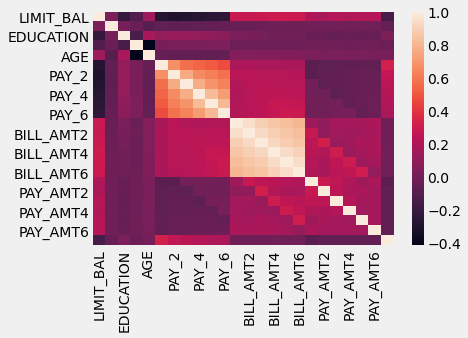

In [27]:
# 使用 seaborn 產生熱區圖heatmaps
import seaborn as sns
import matplotlib.style as style
# 指定繪圖風格
style.use('fivethirtyeight')


sns.heatmap(credit_card_default.corr())

In [28]:
# 篩選出只有特徵和結果的相關性
credit_card_default.corr()['default payment next month'] 

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [29]:
credit_card_default.corr()['default payment next month'].abs() > .2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [30]:
highly_correlated_features = credit_card_default.columns[credit_card_default.corr()['default payment next month'].abs() > .2]

highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [31]:
highly_correlated_features = highly_correlated_features.drop('default payment next month')

highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [33]:
feature_df_subsetted = feature_df[highly_correlated_features]

get_best_model_and_accuracy(d_tree, tree_params, feature_df_subsetted, result) 

Best Accuracy: 0.8213333333333332
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.014
Average Time to Score (s): 0.002
